In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\KAGGLE\test.csv')
df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [3]:
df.shape

(418, 11)

In [4]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
# AGE
Q1_age = df['Age'].quantile(.25)
Q3_age = df['Age'].quantile(.75)
IQR_age = Q3_age - Q1_age
upper_limit_age = Q3_age + 1.5 * IQR_age
lower_limit_age = Q1_age - 1.5 * IQR_age

#df[(upper_limit_age<df['Age']) | (lower_limit_age >df['Age'])]

In [7]:
# FARE
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

upper_limit_fare =Q3_fare + 1.5 *IQR_fare
lower_limit_fare = Q1_fare - 1.5 * IQR_fare

#df[(df['Fare'] < lower_limit_fare) | (df['Fare'] > upper_limit_fare)]
      

**Data preprocessing**

**Data Cleaning**

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [9]:
df.drop(columns = ['Cabin'],axis = 1,inplace = True)

In [10]:
df.dropna(subset = ['Embarked'],axis = 0 ,inplace = True)

In [11]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket'],axis = 1,inplace= True)

**Data Transformation**

In [12]:
df['Fare'] = np.log(df['Fare'] +1)

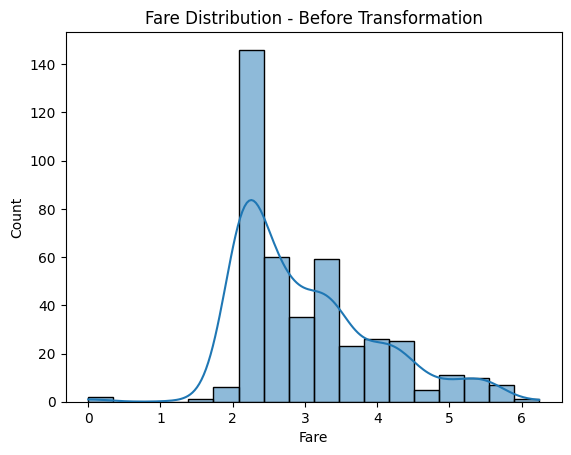

In [13]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution - Before Transformation')
plt.show()


In [14]:
df['Fare'].skew()

0.8621677993028872

**outlier Treat**

In [15]:
df['Age'] = df['Age'].clip(lower = lower_limit_age ,upper = upper_limit_age)

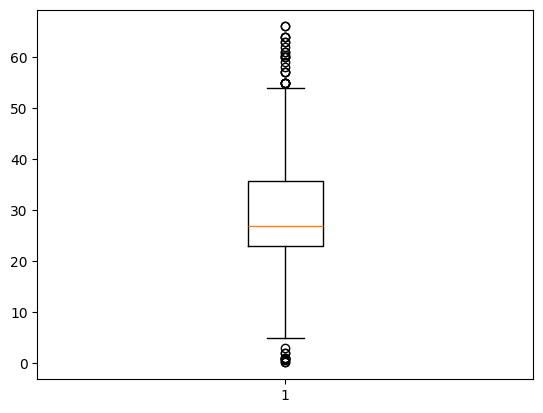

In [16]:
plt.boxplot(df['Age'])
plt.show()

In [17]:
print(df['Fare'].clip(lower = lower_limit_age,upper = upper_limit_age,inplace = True))

None


**Scaling on continuous columns**

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Age','Fare']] = sc.fit_transform(df[['Age','Fare']])
df

Pclass     Sex       Age  SibSp  Parch      Fare Embarked
0         3    male  0.390934      0      0 -0.866767        Q
1         3  female  1.382743      1      0 -0.968773        S
2         2    male  2.572914      0      0 -0.669205        Q
3         3    male -0.204151      0      0 -0.773486        S
4         3  female -0.600875      1      1 -0.443987        S
..      ...     ...       ...    ...    ...       ...      ...
413       3    male -0.204151      0      0 -0.841220        S
414       1  female  0.747985      0      0  1.741229        C
415       3    male  0.708313      0      0 -0.936946        S
416       3    male -0.204151      0      0 -0.841220        S
417       3    male -0.204151      1      1  0.139492        C

[418 rows x 7 columns]

**Label Encoding on Categorical Data**

In [20]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
# encoding on Sex
df['Sex'] = le.fit_transform(df['Sex'])
# encoding on Embarked
df['Embarked'] = le.fit_transform(df['Embarked'])
df

Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  0.390934      0      0 -0.866767         1
1         3    0  1.382743      1      0 -0.968773         2
2         2    1  2.572914      0      0 -0.669205         1
3         3    1 -0.204151      0      0 -0.773486         2
4         3    0 -0.600875      1      1 -0.443987         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1 -0.204151      0      0 -0.841220         2
414       1    0  0.747985      0      0  1.741229         0
415       3    1  0.708313      0      0 -0.936946         2
416       3    1 -0.204151      0      0 -0.841220         2
417       3    1 -0.204151      1      1  0.139492         0

[418 rows x 7 columns]

In [21]:
df.to_csv('cleaned_test.csv',index = False)

In [22]:
import joblib
model = joblib.load('Titenic.joblib')
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, ...)

In [25]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [29]:
feature = ['Pclass', 'Sex', 'Age', 'SibSp',  'Fare', 'Embarked']

In [30]:
X_test = df[feature]

In [31]:
y_pred = model.predict(X_test)

In [35]:
df1 = pd.DataFrame(y_pred,columns = ['survived'])
df1

survived
0           0
1           0
2           0
3           0
4           0
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]

In [37]:
import pandas as pd

test_df = pd.read_csv(r'C:\Users\sahur\Downloads\KAGGLE\test.csv')


In [38]:
df1 = pd.DataFrame(y_pred, columns=['Survived'])  # Use capital 'S' to match Kaggle format


In [39]:
df1['PassengerId'] = test_df['PassengerId']


In [42]:
submission = df1[['PassengerId', 'Survived']]

submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [41]:
submission.to_csv('submission.csv', index=False)
